# Diffusion coefficient from a VASP file

Using ``kinisi`` for the analysis of a VASP Xdatcar type file is really straightforward and involves using the ``DiffAnalyzer`` class.

In [1]:
from kinisi.analyze import DiffAnalyzer

There the ``params`` dictionary describes details about the simulation, and are documented in the [parser module](./parser.html).

In [2]:
params = {'specie': 'Li',
          'time_step': 2.0,
          'step_skip': 50,
          'min_obs': 50}

In [3]:
diff = DiffAnalyzer('example_XDATCAR.gz', params)

Bootstrapping Displacements: 100%|██████████| 139/139 [00:15<00:00,  9.20it/s]


The ``DiffAnalyzer`` will perform the block-bootstrapping process to obtain the displacements and uncertainties, before estimating the correlation matrix betwen the points to sample the diffusion coefficient, $D$, additionally the non-gaussian parameter is used to find the start of the diffusive regime (this is idenified on the plot below with the green vertical line).
It is possible to then probe the `D` object itself.

We can get the median and 95 % confidence interval using, 

In [4]:
diff.D

(1.399+/-0.005)e-4

We can plot the data and some of the samples from the $D$ and $D_{\text{offset}}$ distribution.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

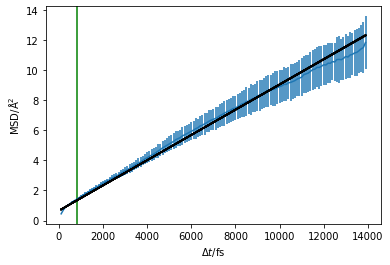

In [6]:
plt.errorbar(diff.dt, diff.msd, diff.msd_err)
for i in np.random.choice(diff.D.size, size=100):
    plt.plot(diff.dt, diff.D.samples[i] * 6 * diff.dt + diff.D_offset.samples[i], 'k', alpha=0.1, zorder=10)
plt.axvline(diff.ngp_max, color='g')
plt.ylabel('MSD/Å$^2$')
plt.xlabel('$\Delta t$/fs')
plt.show()

Additionally, we can visualise the distribution of the diffusion coefficient that has been determined, note that we divide by `10` to change units.

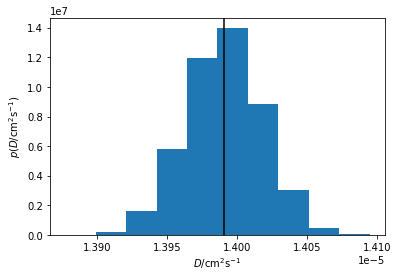

In [7]:
plt.hist(diff.D.samples/10, density=True)
plt.axvline(diff.D.n/10, c='k')
plt.xlabel('$D$/cm$^2$s$^{-1}$')
plt.ylabel('$p(D$/cm$^2$s$^{-1})$')
plt.show()